# Clustering
The following implements the k-means and GMM algorithms from scratch. This is note a task to complete, but please use it to augment your understanding of the notes and methods beyond the implemented APIs we use in the lab. 

The implementations in sklearn do provide additional functionality, however the below implementations should let you have a deeper understanding of the methods.

Also note that this implementation may not be the most efficient, but it should hopefully be readable and intuitive.

In [1]:
import numpy as np
import matplotlib.pyplot as plt   
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


Task 1.1

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

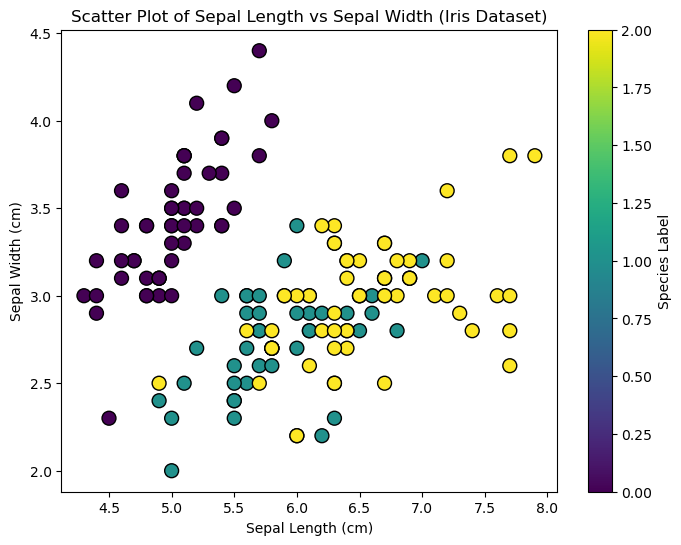

In [2]:
import numpy as np
import matplotlib.pyplot as plt   

file_path_1 = '/Users/nikhilmacbook/Desktop/Swansea MS Modules/BigData and ML CW/cw2/Iris_data.npy'
file_path_2 = '/Users/nikhilmacbook/Desktop//Swansea MS Modules/BigData and ML CW/cw2/Iris_labels.npy'

data = np.load(file_path_1)
labels = np.load(file_path_2)

print(data)
print(labels)

# Choose two features dimensions to plot, keeping it consistent for the notebook
x_feature = 0
y_feature = 1

plt.figure(figsize=(8,6))
scatter = plt.scatter(data[:,x_feature], data[:,y_feature], c=labels, cmap='viridis', edgecolor='k', s=100)
# plt.scatter(labels)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width (Iris Dataset)')

# Add a legend with the unique labels
plt.colorbar(scatter, label='Species Label')

# Display the plot
plt.show()

### Iris Dataset Description

The dataset consists of measurements from Iris flowers. It is commonly used in machine learning for classification and clustering tasks. The dataset comprises 150 samples, with each sample corresponding to a single Iris flower. 

#### Number of Samples:
- **150 samples** (observations of different iris flowers).

#### Features:
The dataset contains four features (numerical values) for each sample:
1. **Sepal Length** (in cm)
2. **Sepal Width** (in cm)
3. **Petal Length** (in cm)
4. **Petal Width** (in cm)

These four features are numerical measurements of the flowers that will be used to distinguish between the species of the iris.

#### Labels:
- The file `Iris_labels.npy` contains the **species labels** for each sample. There are 150 labels corresponding to the 150 samples. 
- The labels are integers, where:
  - `0` represents the species **Iris-setosa**
  - Other species can be represented by additional integers, though the first 10 samples have the label `0` (Iris-setosa).


## K-means Clustering 
The task here is to implement the k-means algorithm. We first define a function to calculate the Euclidean distance between each of the cluster centres and the data, then we initialise our hyper-parameters and create a loop to fit our clusters to the data, iteratively calling the assignment and update operations.

### K-Means algorithm:

Setup: Select random initial set of k cluster centers

Loop:

    for i = 1 to maximum number of iterations
        calculate distance from training points to cluster centroids
        update class labels to the closest centroid's ID
        recalculate centroid locations

In [3]:
# Definition of euclidean distance function
def euclidean_distance(centroids, datapoints):
    '''Compute the Euclidean distance between datapoints and centroids.
    
    Keyword arguments:
    centroids -- KxF matrix, cluster centroids (K centroids, F dimensions)
    datapoints -- NxF matrix, data points observed (N samples, F dimensions)
    
    Returns:
    dists -- NxK matrix, distances from sample N_i to cluster K_i
    '''
    
    n_samples = datapoints.shape[0]
    n_features = datapoints.shape[1]
    n_centroids = centroids.shape[0]
    
    dists = np.zeros(shape=[n_samples, n_centroids])
    for k in range(n_centroids):
        differences = datapoints - centroids[k, :]
        sum_of_squared_differences = np.zeros(n_samples)
        for i_dimension in range(n_features):
            sum_of_squared_differences += differences[:, i_dimension]**2
        dists[:, k] = np.sqrt(sum_of_squared_differences)
        
    return dists


# Definition of k-Means algorithm
def k_means(data, k, n_iteration=10, verbose=None):
    '''Apply the k-means algorithm to cluster the input data into k clusters.
    
    Keyword arguments:
    data -- NxF matrix, the data to cluster (N samples, F dimensions)
    k -- scalar int, the number of clusters to generate
    n_iteration -- scalar int, the maximum number of iterations to carry out
    verbose -- choice of {None, 'print', 'plot'}, whether to output details of each iteration


    Returns:
    predicted_labels -- Nx1 vector, predicted cluster IDs based on k-means model (N samples) 
    centroids -- KxF matrix, cluster center locations (K clusters, F dimensions)
    '''
    
    n_samples = data.shape[0]
    n_features = data.shape[1]
    
    # Initialize centroids by randomly selecting k points. Can we do this another way?
    centroids = data[np.random.choice(n_samples, k, replace=False), :] 
    
    i = 0
    early_stop = False
    early_stop_tolerance = 1e-5
    while i < n_iteration and not early_stop:
        prev_centroids = centroids
        
        # Assignment step
        dists = euclidean_distance(centroids, data)
        predicted_labels = np.argmin(dists, axis=1)

        # Update step
        new_centroids = np.zeros(shape=[k, n_features])
        
        for i_cluster in range(k):
            # Get all datapoints alocated to cluster i_k
            cluster_data = data[predicted_labels == i_cluster, :]
            # Calculate the mean of this cluster
            new_centroids[i_cluster, :] = np.mean(cluster_data, axis=0)
            
        centroids = new_centroids
        update_distance = np.sum(np.abs(centroids - prev_centroids))

        # Verbose printing
        if verbose == 'print':
            print(f'Iteration {i}: update distance = {update_distance}')
        elif verbose == 'plot':
            plt.figure()
            plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
            plt.scatter(centroids[:, x_feature], centroids[:, y_feature], marker='x', s=50)
            plt.title(f'k-Means Iteration {i}, Update dist: {update_distance}')
            plt.show()
                
        # Early stopping
        if update_distance < early_stop_tolerance:
            print(f'Early stop on iteration {i}')
            early_stop = True
        
        i += 1

    # One final assignment to get final predictions
    predicted_labels = np.argmin(euclidean_distance(centroids, data), axis=1)
    
    return predicted_labels, centroids

Iteration 0: update distance = 6.352067669172929
Iteration 1: update distance = 2.7046783625731
Iteration 2: update distance = 0.7453584942749023
Iteration 3: update distance = 0.25446776492147416
Iteration 4: update distance = 0.0
Early stop on iteration 4


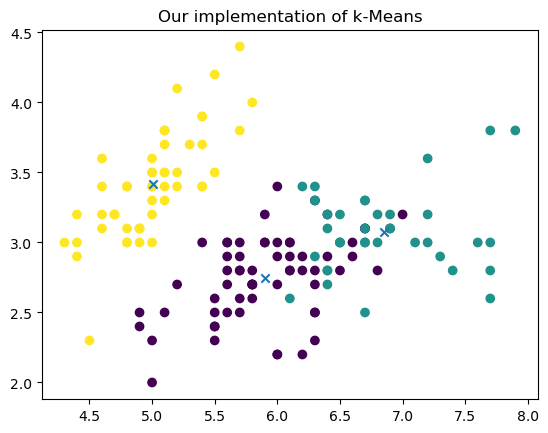

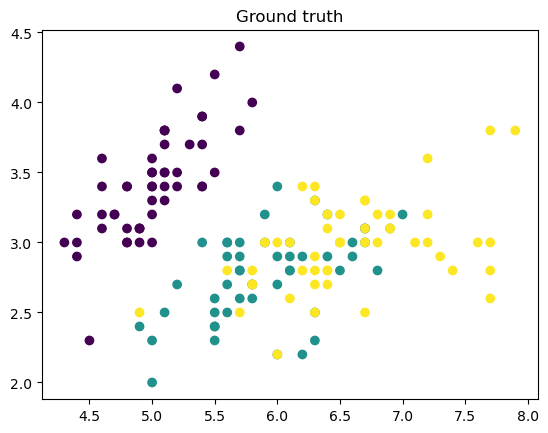

In [4]:
k = 3
n_iteration = 500

predicted_label, k_centroid = k_means(data, k, n_iteration, verbose='print')

# Visualisation of model predictions
plt.figure()
plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
plt.scatter(k_centroid[:, x_feature], k_centroid[:, y_feature], marker='x')
plt.title('Our implementation of k-Means')
plt.show()

# Visualisation of ground truth
plt.figure()
plt.scatter(data[:, x_feature], data[:, y_feature], c=labels)
plt.title('Ground truth')
plt.show()

## Gaussian Mixture Models
The task here is to implement a Gaussian mixture model. We first define some functions for the algorithm, followed by initialisation of the parameters, and finally we implement the loop within which we fit our Gaussians to our data.

### GMM Algorithm:
Setup: Initialise Gaussian distribution centroid, standard deviations and mixing coefficients using k-means coefficients.

Loop: 

    Compute E-Step: calculate posteriors for the data given current Gaussian parameters 
    Compute M-Step: update model parameters 

In [5]:
# E-Step
def multivariate_gaussian_density(data, mu, cov):
    '''Apply the E-Step of the GMM algorithm. Calculating the multivariate Gaussian density of the data.
    
    Keyword arguments:
    data -- 1xF, data sample (F dimensions)
    mu -- 1xF vector, mean location of the Gaussian component (F dimensions)
    cov -- FxF matrix, the covariance matrix of the Gaussian component (F dimensions)
    
    Returns:
    result -- scalar, the Gaussian density function response (probability)
    '''
    
    n_sample = data.shape[0]
    
    determinant = np.linalg.det(cov)
    normalisation_factor = 1.0 / ((2 * np.pi)**(n_sample / 2) * determinant ** (1.0 / 2))
    mean_centred_data = data - mu
    inverse_covariance = np.linalg.inv(cov)
    result = np.e**(-(1.0 / 2) * (mean_centred_data @ inverse_covariance @ mean_centred_data.T))
    result = normalisation_factor * result
    
    return result


# Calculate the posterior probabilities per component for each datapoint
def posterior_prob(data, centroids, cov, mix):
    '''Calculate posterior probability for each Guassian component.
    
    Keyword arguments:
    data -- NxF matrix, data to cluster (N samples, F dimensions)
    centroids -- GxF matrix, current centroids (mu) of the Gaussian components (G components)
    cov -- FxFxG tensor, current covariance matrices (FxF) for each Gaussian component
    mix -- Gx1 vector, current mixing coefficients for each Gaussian component
    
    Returns:
    posteriors -- NxG matrix, posterior probability that each sample belongs to a Gaussian component (N samples, G components)
    '''
    
    n_sample = data.shape[0]
    n_component = centroids.shape[0]
    p = np.zeros([n_sample, n_component])
    p_total = np.zeros(n_sample)
    posteriors = np.zeros([n_sample, n_component])

    for i_sample in range(n_sample):
        for i_component in range(n_component):
            p[i_sample, i_component] = multivariate_gaussian_density(
                data[i_sample, :].T, centroids[i_component, :], cov[:, :, i_component])
            p_total[i_sample] = p_total[i_sample] + p[i_sample, i_component]

        for i_component in range(n_component):
            posteriors[i_sample, i_component] = (
                p[i_sample, i_component] * mix[i_component]) / (p_total[i_sample] * mix[i_component])
    
    return posteriors


# M-Step
def update_params(data, posteriors, mix, cov, centroids):
    '''Apply the M-Step of GMM algorithm. Updating the component parameters and assignments.
    
    Keyword arguments:
    data -- NxF matrix, data to cluster (N samples, F dimensions)
    posteriors -- NxG matrix, posterior probability that each sample belongs to a Gaussian component (N samples, G components)
    mix -- Gx1 vector, current mixing coefficients for each Gaussian component
    cov -- FxFxG tensor, current covariance matrices (FxF) for each Gaussian component
    centroids -- GxF matrix, current centroids (mu) of the Gaussian components (G components)
    
    Returns:
    new_mix -- Gx1 vector, updated mixing coefficients for each Gaussian component
    new_cov -- FxFxG tensor, updated covariance matrices (FxF) for each Gaussian component
    new_centroids -- GxF matrix, updated centroids (mu) of the Gaussian components (G components)
    '''
    
    n_sample = data.shape[0]
    n_component = centroids.shape[0]
    
    # Transpose due to numpy's handling of dimensions
    data = data.T
    
    # Update mixing coefs
    cluster_weight = np.sum(posteriors, axis=0)
    new_mix = (1/data.shape[0]) * cluster_weight

    # Update centroids
    new_centroids = np.zeros(centroids.shape)
    for i_component in range(n_component):
        new_centroids[i_component, :] = np.sum(posteriors[:, i_component] * data, axis=1) / cluster_weight[i_component]

    # Update covariance matrices
    new_cov = np.zeros(cov.shape)
    for i_component in range(n_component):
        mu_centred_data = data - np.expand_dims(new_centroids[i_component, :], axis=-1)
        for i_sample in range(n_sample):
            cov = mu_centred_data[:, i_sample:i_sample+1] @ mu_centred_data[:, i_sample:i_sample+1].T
            scaled_cov = posteriors[i_sample, i_component] * cov
            new_cov[:, :, i_component] += scaled_cov
            
        new_cov[:, :, i_component] /= cluster_weight[i_component]

    return new_mix, new_cov, new_centroids


# Definition of GMM function, iteratively applying the E and M steps
def gmm(data, g, n_iteration=10, verbose=None):
    '''Apply the GMM algorithm to cluster the input data into g Gaussian components.
    
    Keyword arguments:
    data -- NxF matrix, data to cluster (N samples, F dimensions)
    g -- scalar int, the number of clusters to generate
    n_iteration -- scalar int, the maximum number of iterations to carry out
    verbose -- choice of {None, 'print', 'plot'}, whether to output details of each iteration
    
    Returns:
    predicted_labels -- Nx1 vector, predicted cluster IDs based on k-means model (N samples) 
    posteriors -- NxG matrix, posterior probability that each sample belongs to a Gaussian component (N samples, G components)
    centroids -- KxF matrix, cluster center locations (K clusters, F dimensions)
    cov -- FxFxG tensor, current covariance matrices (FxF) for each Gaussian component    
    mix -- Gx1 vector, current mixing coefficients for each Gaussian component
    '''
    
    n_sample = data.shape[0]
    
    # Initialise our Gaussian components by randomly selecting datapoints and allocating equal mixing coefficients. 
    # How could we use k-means here?
    # _ , centroids = k_means(data, 3) 
    centroids = data[np.random.choice(n_sample, g, replace=False), :]
    cov = np.repeat(np.cov(data, rowvar=False)[:, :, np.newaxis], g, axis=-1)
    mix = np.ones(g) / g

    i = 0
    early_stop = False
    early_stop_tolerance = 1e-5
    while i < n_iteration and not early_stop:
        prev_centroids = centroids
        
        # E-Step
        posteriors = posterior_prob(data, centroids, cov, mix)
        predicted_labels = np.argmax(posteriors, axis=1)

        # M-Step
        mix, cov, centroids = update_params(
            data, posteriors, mix, cov, centroids)
        
        update_distance = np.sum(np.abs(centroids - prev_centroids))
        
        # Verbose printing
        if verbose == 'print':
            print(f'Iteration {i}: update distance = {update_distance}')
        elif verbose == 'plot':
            plt.figure()
            plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
            plt.scatter(centroids[:, x_feature], centroids[:, y_feature], marker='x')
            plt.title(f'k-Means Iteration {i}, Update dist: {update_distance}')
            plt.show()
                
        # Early stopping
        if update_distance < early_stop_tolerance:
            print(f'Early stop on iteration {i}')
            early_stop = True
        
        i += 1

    # One final assignment to get final predictions
    predicted_labels = np.argmax(posterior_prob(data, centroids, cov, mix), axis=1)
    
    return predicted_labels, posteriors, centroids, cov, mix

### Main loop of GMM fitting
Loop over our iterations, computing steps E and M repeatedly.

Iteration 0: update distance = 3.134696917323118
Iteration 1: update distance = 1.50501130509436
Iteration 2: update distance = 1.379768665342772
Iteration 3: update distance = 1.0764322301177986
Iteration 4: update distance = 0.9736820114357673
Iteration 5: update distance = 0.6157397401627156
Iteration 6: update distance = 0.3340431428428918
Iteration 7: update distance = 0.26045660928834624
Iteration 8: update distance = 0.07609665053058204
Iteration 9: update distance = 0.014943279822354022
Iteration 10: update distance = 0.008423126056132213
Iteration 11: update distance = 0.007655677330903471
Iteration 12: update distance = 0.0064100088393625465
Iteration 13: update distance = 0.0052321271738163255
Iteration 14: update distance = 0.004225094768494392
Iteration 15: update distance = 0.003431131651611935
Iteration 16: update distance = 0.0027734953604021118
Iteration 17: update distance = 0.002235482063476568
Iteration 18: update distance = 0.0017987611640363499
Iteration 19: updat

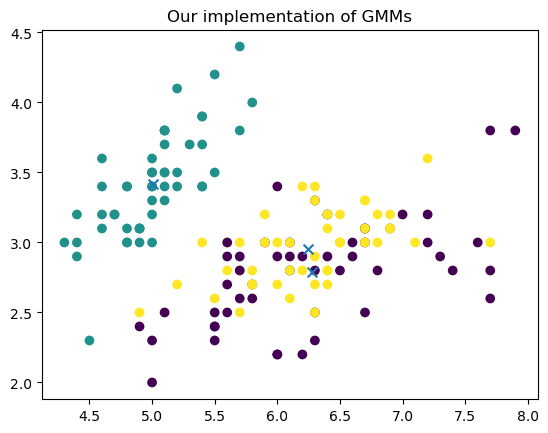

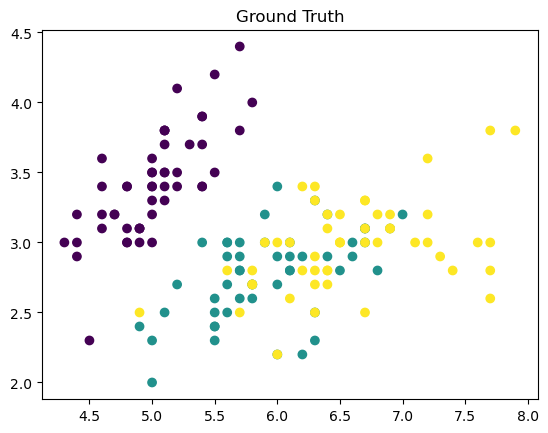

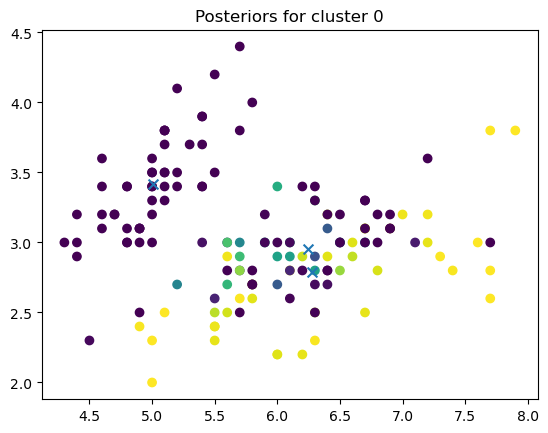

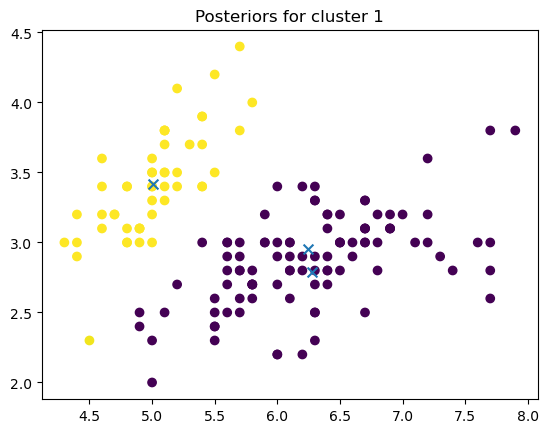

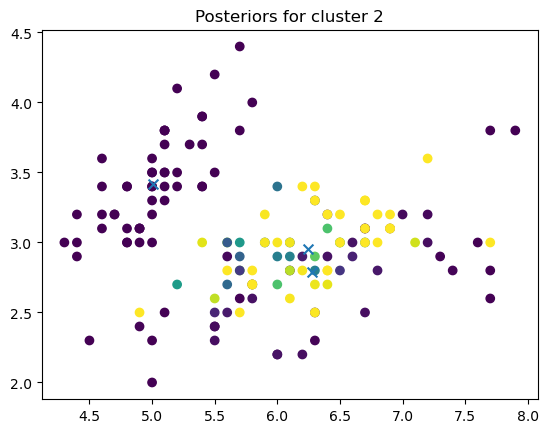

In [6]:
g = 3
n_iteration = 100

predicted_label, posteriors, centroids, cov, mix = gmm(data, g, n_iteration, 'print')

# Visualisation of model predictions
plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
plt.scatter(centroids[:, x_feature], centroids[:, y_feature], s=50, marker='x')
plt.title('Our implementation of GMMs')
plt.show()

# Visualisation of ground truth
plt.scatter(data[:, x_feature], data[:, y_feature], c=labels)
plt.title('Ground Truth')
plt.show()

# Visualisation of model posteriors
for i_component in range(g):
    plt.scatter(data[:, x_feature], data[:, y_feature], c=posteriors[:, i_component])
    plt.scatter(centroids[:, x_feature], centroids[:, y_feature], s=50, marker='x')
    plt.title(f'Posteriors for cluster {i_component}')
    plt.show()

### Task 2.2
Implementing Kmeans clustering where I am importing API to use Clustering model.
I have then used functions fit and predict to predict clustering by assuming k as 4 and then plotting it onto a scatterplot

In [16]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data)
kmeans.predict(data)
cluster_labels = kmeans.labels_
cluster_centre=kmeans.cluster_centers_
print(cluster_centre.shape)

(3, 4)


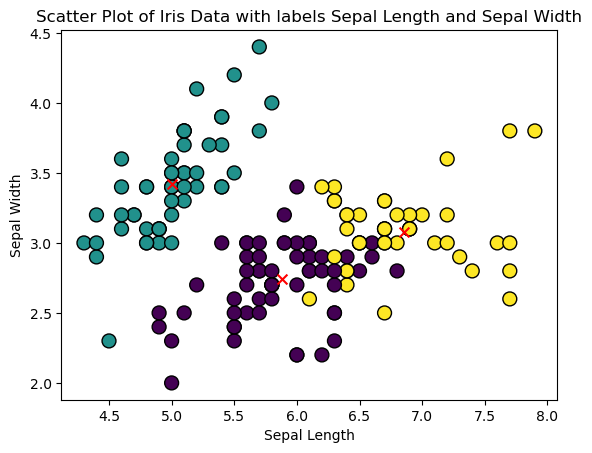

In [8]:
from matplotlib.markers import MarkerStyle
#iris['cluster'] = cluster_labels
plt.figure()
plt.scatter ( data[:, x_feature ], data[:, y_feature ], c=cluster_labels,cmap='viridis', edgecolor='k', s=100)
#sizeofcluster=np.array[20,20,20,20]
marker_style = MarkerStyle(marker='X', fillstyle='full')
plt . xlabel ( 'Sepal Length') # Add x axis label (Sepal Length)
plt . ylabel ( 'Sepal Width') # Add y label (Sepal Width)
plt . title ( 'Scatter Plot of Iris Data with labels Sepal Length and Sepal Width')
plt.scatter(cluster_centre[:,x_feature],cluster_centre[:,y_feature],color='red',marker='x', s=50,label='Centroid')
plt.show()

In [9]:
#We will be using Kmeans++ and init functions to increase the efficiency of clustering
#init parameter=Method for initialisation, we can use different method calls like k means ++ for better results
#n_init‘auto’ or int, default=’auto’
#n_init=Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia.

kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4, random_state=0)
kmeans.fit(data)
kmeans.predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Task 2.3
1. Importing GMM model from mixture class
2. predicting and fitting the data
3. Plotting the data

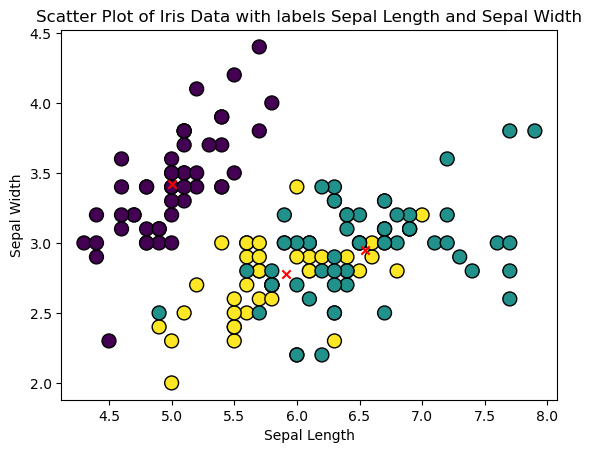

In [10]:
from sklearn.mixture import GaussianMixture
n_components=3
#print(data)
#features=data[ :1 , :2]
gm = GaussianMixture(n_components)

#print(features)
#print(features)
gm.fit(data)
gm_means=gm.means_
gm_labels=gm.predict(data)
plt.figure()
plt.scatter(data[:, x_feature], data[:, y_feature], c=gm_labels,cmap='viridis', edgecolor='k', s=100)
plt.scatter(gm_means[:,x_feature ],gm_means[:, y_feature],color='red',marker='x',label='GMM mean')
plt . xlabel ( 'Sepal Length') # Add x axis label (Sepal Length)
plt . ylabel ( 'Sepal Width') # Add y label (Sepal Width)
plt . title ( 'Scatter Plot of Iris Data with labels Sepal Length and Sepal Width')
#print(gm.means)
#plt.scatter(gm.means)
plt.show()

#print(gmm)
#print(np.argmax(gmm))


/var/folders/ms/__lzmvnx6ds24wkm37w2bp780000gn/T/ipykernel_76539/840471116.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([f"{10**int(x):.1e}" for x in np.arange(-4, 1)])  # Custom labels for clarity
/var/folders/ms/__lzmvnx6ds24wkm37w2bp780000gn/T/ipykernel_76539/840471116.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([f"{10**int(x):.1e}" for x in np.arange(-4, 1)])  # Custom labels for clarity
/var/folders/ms/__lzmvnx6ds24wkm37w2bp780000gn/T/ipykernel_76539/840471116.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([f"{10**int(x):.1e}" for x in np.arange(-4, 1)])  # Custom labels for clarity


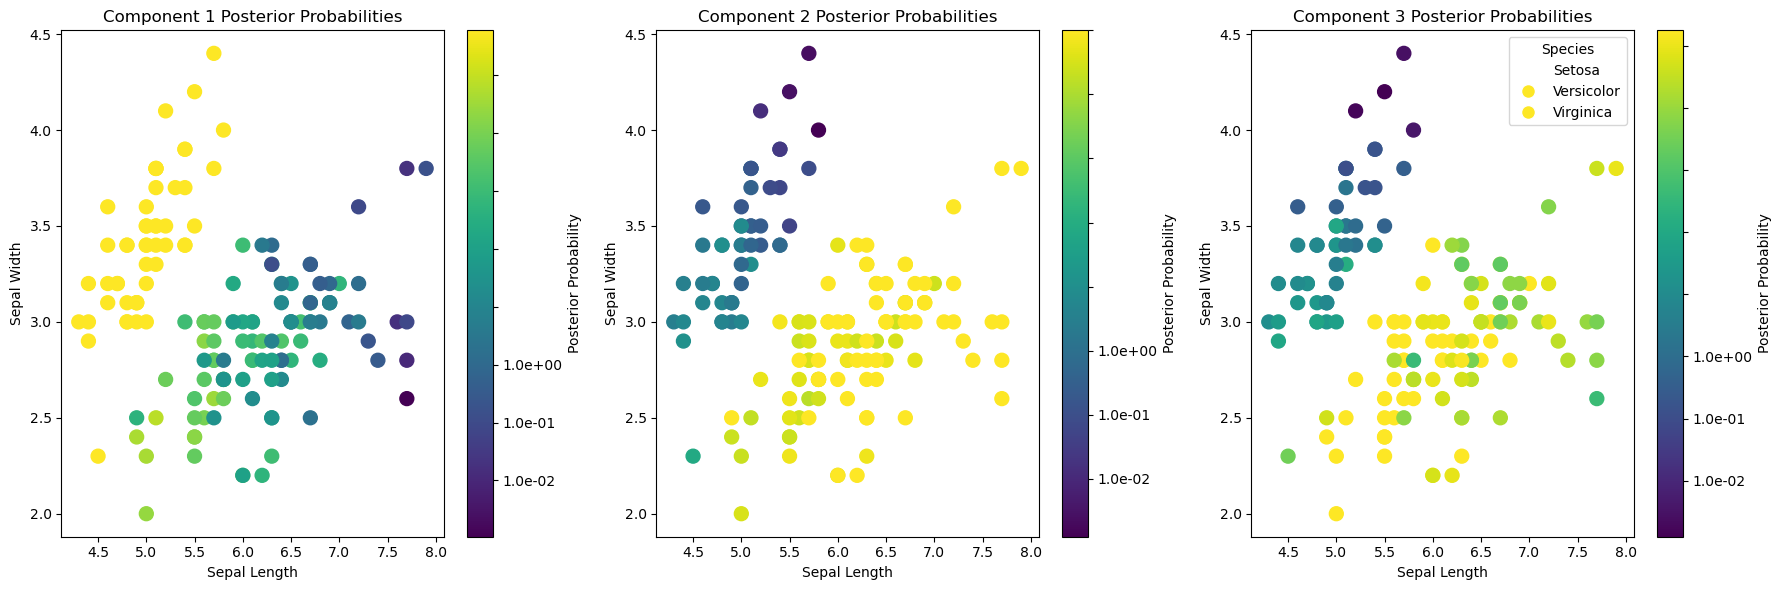

In [12]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.colorbar as colorbar

# Assuming `gm` is the GaussianMixture model already fitted and `data` is the dataset
posterior_probs = gm.predict_proba(data)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Step 6: Produce scatter plots for each Gaussian component
# Each plot is colored by the posterior probability of each data point belonging to each Gaussian component
for i in range(3):  # for each of the 3 Gaussian components
    scatter = ax[i].scatter(data[:, x_feature], data[:, y_feature], 
                            c=posterior_probs[:, i], cmap='viridis', 
                            s=100, norm=LogNorm())
    ax[i].set_title(f'Component {i+1} Posterior Probabilities')
    ax[i].set_xlabel('Sepal Length')
    ax[i].set_ylabel('Sepal Width')
    legend_labels = ['Setosa', 'Versicolor', 'Virginica']
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=scatter.cmap(scatter.norm(i)))
           for i, label in enumerate(legend_labels)]
    
    # Adding color bar to each subplot
    cbar = plt.colorbar(scatter, ax=ax[i])
    cbar.set_label('Posterior Probability')
    cbar.ax.set_yticklabels([f"{10**int(x):.1e}" for x in np.arange(-4, 1)])  # Custom labels for clarity

plt.legend(handles=handles, title="Species")
plt.tight_layout()
plt.show()


Task 2.4

(100, 10)
(6, 10)


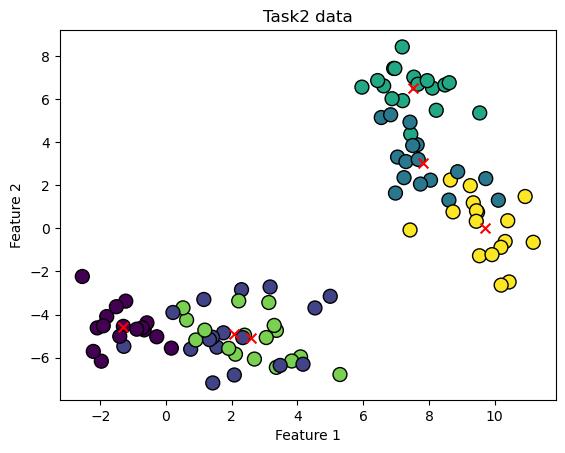

In [13]:
task2=np.load('/Users/nikhilmacbook/Desktop/Swansea MS Modules/BigData and ML CW/cw2/task2_4.npy')
print(task2.shape)

#K-Means clustering

t_clusters = 6
kmeans = KMeans(n_clusters=t_clusters)
kmeans.fit(task2)
kmeans.predict(task2)
cluster_labels2 = kmeans.labels_
cluster_centre2=kmeans.cluster_centers_
print(cluster_centre2.shape)
plt.figure()
plt.scatter ( task2[:,[0]], task2[:,[1]], c=cluster_labels2,cmap='viridis', edgecolor='k', s=100)
plt . title ( 'Task2 data')
plt . xlabel ( 'Feature 1')
plt . ylabel ( 'Feature 2')
plt.scatter(cluster_centre2[:,0],cluster_centre2[:,1],color='red',marker='x', s=50)

I have found the predicted K with the help of Elbow method and also visualised the result,
I am getting value of K as 6

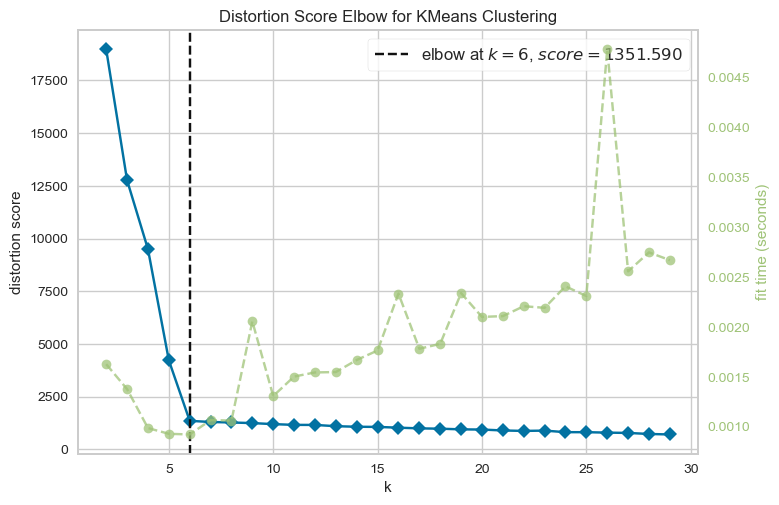

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(task2)        # Fit data to visualizer
visualizer.show()

(100,)


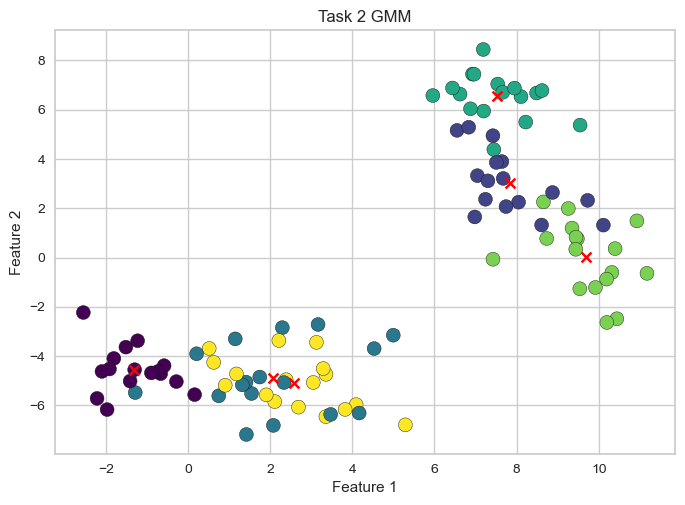

In [15]:
# GMM

gm = GaussianMixture(n_components=6)
#print(task2.shape)
gm.fit(task2)
gm_means=gm.means_
#print(gm_means)
gm_labels=gm.predict(task2)
print(gm_labels.shape)
plt.figure()
plt.scatter(task2[:,[0]], task2[:,[1]],c=gm_labels,cmap='viridis', edgecolor='k', s=100)
plt.scatter(gm_means[:,[0]],gm_means[:,[1]],color='red',marker='x',s=50,label='GMM-Means')
plt . title ( 'Task 2 GMM')
plt . xlabel ( 'Feature 1')
plt . ylabel ( 'Feature 2')
#print(gm.means)
#plt.scatter(gm.means)
plt.show()

Task 2.5
1. This is defined in the method "euclidean distance function" which is used to minimise the distance btw centroids and datapoints
2.The GMM equations is defined in functions posterior_prob and multivariate_gaussian_density.
3. GMM implemented from scratch performs worse than skicit learn model because the init parameter in the initilization helps the model to stop when the distance from mean